# Laboratorio 4
Sebastian Garcia 201630047

In [1]:
def get_entero_positivo():
    try:
        numero = int(input("Numero entero: ") or "0")
        if numero < 0:
            print("Numero negativo no es valido.")
        else:
            return numero
    except:
        print("Numero no entero es invalido.")
        return 0
    return 0

def get_real():
    numero = float(input("Numero real: ") or "0.0")
    return numero

### Ejercicio 1
Realice un función recursiva que permita determinar si un número entero positivo pertenece a la serie de Fibonacci.

In [2]:
## 
from math import sqrt

def es_cuadrado(n) -> bool:
    # caso base
    if n < 0: return False
    # en HEX, los cuadrados terminan en 0, 1 ,4, o 9
    if (n & 0xf) in (0, 1, 4, 9): return sqrt(n) % 1 == 0 # si la raiz es entera
    return False

# un numero N pertenece a la serie si (5N^2 + 4) o (5N^2 – 4) es un cuadrado perfecto
def _en_fibonacci(N, f=4) -> bool:
    if es_cuadrado((5 * (N ** 2)) + f):
        return True
    elif f == -4:
        return False
    else:
        return _en_fibonacci(N, f=-4)

n = get_entero_positivo()
r = "Si" if _en_fibonacci(n) else "No"
print(f"¿Esta en la secuencia de fibonacci?\n{r}")

Numero entero: 8
¿Esta en la secuencia de fibonacci?
Si


### Ejercicio 2
 Realice un función recursiva que permita determinar si un número entero positivo pertenece a la serie de cuadrada. (Un número pertenece a la serie cuadrada si la parte fraccionaria de su correspondiente raíz cuadrada es cero, por ejemplo: 1, 4, 9, 16, 25, 36, 49, etc., es decir, si su raíz cuadrada es un número entero).

In [3]:
## 
def _es_cuadrado( n, i=1) -> bool:
    if ( n * 100 ) - ( i * i ) <= 0 :
        return ( i/10 ) % 1 == 0 # es entero
    else:
        return _es_cuadrado(n, i + 1 );

n = get_entero_positivo()
r = "Si" if _es_cuadrado(n) else "No"
print(f"¿Esta en la serie cuadrada?\n{r}")

Numero entero: 49
¿Esta en la serie cuadrada?
Si


### Ejercicio 3
Escriba una función recursiva que devuelva el valor de la serie de Taylor de ex para un número real dado x y un número máximo de términos en la serie N.

In [4]:
##
import math

def taylor_exp(x, N):
    if N == 0: return 1
    return (( x ** N) / math.factorial(N)) + taylor_exp(x, N - 1 )
    
x = get_real() # 2.34
N = get_entero_positivo() # 20
ty = taylor_exp(x, N) # 10.381236562730605
print("Serie de Taylo de exponente\n", ty)

Numero real: 2.34
Numero entero: 20
Serie de Taylo de exponente
 10.381236562730605


### Ejercicio 4
 Escriba una función recursiva que devuelva el valor de la serie de Taylor del seno (sen(x)) para un número real dado x y un número máximo de términos en la serie N.

In [5]:
##
import math

def taylor_seno(x, N):
    if N == 0: return x
    return (((-1.0) ** N) / (math.factorial(2.0 * N + 1.0))) * ( x ** (2.0 * N + 1.0) ) + taylor_seno(x, N-1)

    
x = get_real() # 2.34
N = get_entero_positivo() # 5
ty = taylor_seno(x, N) # 0.7184549238687695
print("Serie de Taylo de seno\n", ty)

Numero real: 2.34
Numero entero: 5
Serie de Taylo de seno
 0.7184549238687695


### Ejercicio 5
Escriba una función recursiva que devuelva el valor de la serie de Taylor del coseno (cos(x)) para un número real dado x y un número máximo de términos en la serie N.

In [6]:
##
import math

def taylor_coseno(x, N):
    # condicion de parada
    if N == 0: return x
    return (((-1.0) ** N) / (math.factorial(2.0 * N ))) * ( x ** (2.0 * N ) ) + taylor_coseno(x, N-1)

    
x = get_real() # 2.34
N = get_entero_positivo() # 5
ty = taylor_coseno(x, N) # 0.6443820614840369
print("Serie de Taylo de coseno\n", ty)

Numero real: 2.34
Numero entero: 5
Serie de Taylo de coseno
 0.6443820614840369


### Ejercicio 6
A partir de la función realizada en el punto 3, realice una curva que presente el valor estimado de ex para valores de N desde 10 hasta 1000 con pasos de 10; realice otra curva que presente el error absoluto de la serie para los mismos valores estimados de N (10:10:1000); realice otra curva que presente el error relativo de la serie para los mismos valores estimados de N (10:10:1000). Tome como valor “verdadero” (más preciso) el que devuelve la función nativa ex del lenguaje de programación.

### Ejercicio 7
Repita el punto 6 para la función realizada en el punto 4 (sen(x)).

### Ejercicio 8
Repita el punto 6 para la función realizada en el punto 5 (cos(x)).

### Ejercicio 9
Realice un programa que genere 1000 número aleatorios enteros entre -10 y 10 y los guarde un archivo binario con formato de 16 bits (int16). El archivo se debe llamar FileBinInt16.bin.

In [7]:
##
import struct
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

file_name = "FileBinInt16.bin"
with open(file_name, 'wb') as f:
    vals = np.random.randint(-10, 10, size=(1000,))
    for val in vals:
        f.write(struct.pack( "<h", int(val) ))        

### Ejercicio 10
 Realice un programa que lea los datos guardados en el archivo creado en el punto 9 y grafique el histograma correspondiente usando 30 casillas (30 bins).

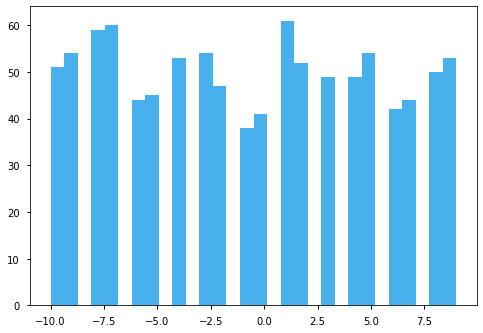

In [8]:
##
file_name = "FileBinInt16.bin"
kwargs = dict(bins=30, alpha=0.9, histtype='stepfilled', color='#34a8eb', edgecolor='none')

with open(file_name, 'rb') as f:
    x = f.read()
    valores = np.double(struct.unpack("h"*int(len(x)/2), x)) # size short = 2B

    plt.style.use('seaborn-notebook')
    plt.hist(valores, **kwargs)
    plt.show()

### Ejercicio 11
Realice un programa que genere 1000 número aleatorios reales entre -1 y 1 y los guarde un archivo binario con formato de 64 bits (double). El archivo se debe llamar FileBinDouble.bin.

In [9]:
##
import struct
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

file_name = "FileBinDouble.bin"
with open(file_name, 'wb') as f:
    vals = np.random.uniform(-1, 1, size=(1000,))
    for val in vals:
        f.write(struct.pack( "d", val ))      

### Ejercicio 12
Realice un programa que lea los datos guardados en el archivo creado en el punto 11 y grafique el histograma correspondiente usando 30 casillas (30 bins).

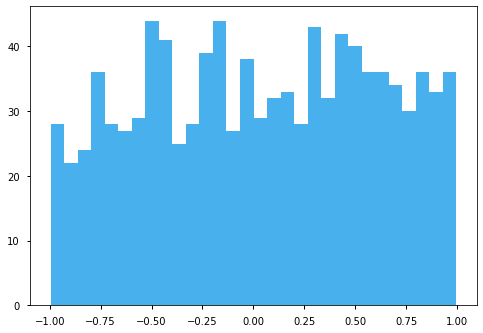

In [10]:
##
file_name = "FileBinDouble.bin"
kwargs = dict(bins=30, alpha=0.9, histtype='stepfilled', color='#34a8eb', edgecolor='none')

with open(file_name, 'rb') as f:
    x = f.read()
    valores = np.double(struct.unpack("d"*int(len(x)/8), x)) # size double => 8B
    plt.style.use('seaborn-notebook')
    plt.hist(valores, **kwargs)
    plt.show()

### Ejercicio 13
En el archivo binario File-214.bin se encuentran una serie de números enteros sin signo (unsigned), cada uno almacenado en 32 bits. El promedio de todos los datos es: 64023.8381.

Realice un programa que lea adecuadamente todos los datos de este archivo y comprueba el valor promedio de todos los datos.

In [11]:
## 
## File-214

file_name = "File-214.bin"

with open(file_name, 'rb') as f:
    x = f.read()
    valores = np.double(struct.unpack("i"*int(len(x)/4), x)) # size double => 8B
    print("Promedio esperado: ", f'{np.mean(valores):0.4f}' == '64023.8381' )

Promedio esperado:  True


### Ejercicio 14
A partir de los datos leídos de en el punto 13, realice un programa que permita determinar el número de datos que pertenecen a la serie de Fibonacci y escriba el número total de datos que pertenecen a esta serie (utilice la función realizada en el punto 1).

In [12]:
##
file_name = "File-214.bin"

with open(file_name, 'rb') as f:
    x = f.read()
    valores = np.double(struct.unpack("i"*int(len(x)/4), x)) # size double => 8B
    cont = 0
    for x in valores:
        if _en_fibonacci(int(x)): cont += 1
    print(f'{cont} numeros en la serie de Fibonacci')

134 numeros en la serie de Fibonacci


### Ejercicio 15
 A partir de los datos leídos de en el punto 13, realice un programa que permita determinar el número de datos que pertenecen a la serie cuadrada y escriba el número total de datos que pertenecen a esta serie (utilice la función realizada en el punto 2).

In [13]:
##
file_name = "File-214.bin"

with open(file_name, 'rb') as f:
    x = f.read()
    valores = np.double(struct.unpack("i"*int(len(x)/4), x)) # size double => 8B
    cont = 0
    for x in valores:
        if es_cuadrado(int(x)): cont += 1
    print(f'{cont} numeros en la serie cuadrada')

8 numeros en la serie cuadrada
